# Large_Scale_Preprocessing(대용량 이미지 전처리)

## Download Dataset(캐글에서 데이터셋 다운로드받기)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 캐글 설치
!pip install -q kaggle

- kaggle.json 파일이 현재 content 경로에 있음
- root/.kaggle 폴더로 이동시켜줘야 함
--------------------------------
- root는 ~로 표시함
- .kaggle폴더는 없기 때문에 우리가 직접 만들어줘야함

In [ ]:
# .kaggle 폴더 생성
!mkdir -p ~/.kaggle/
# kaggle.josn .kaggle로 복사
# !cp /content/drive/MyDrive/LectureSpace/OpenDataset/kaggle.json ~/.kaggle/
!cp /content/drive/MyDrive/dataset/kaggle.json ~/.kaggle/
# 해당 폴더 목록 확인(복사 잘 되었는지 확인)
!ls ~/.kaggle

kaggle.json


- root 경로에 .kaggle폴더가 잘 만들어졌는지 확인하고 싶다면
- root경로의 목록에 .kaggle폴더가 있는지 확인만 하면 됨
-----------
1) root경로로 이동 (cd ~)   
2) root 경로의 목록을 확인 (!ls -a)

In [ ]:
# 경로 이동 (~:루트경로로 이동)
%cd ~

/root


In [ ]:
!ls -a # 해당 경로 목록 전부(-a: 숨김파일까지) 확인

.   .bashrc  .config   .julia	 .kaggle  .launchpadlib  .npm	   .tmux.conf
..  .cache   .ipython  .jupyter  .keras   .local	 .profile  .wget-hsts


In [ ]:
!ls ~/.kaggle -al # 해당 경로 목록 상세정보까지(-al: 권한정보, 날짜) 확인

total 16
drwxr-xr-x 2 root root 4096 Jun  4 07:42 .
drwx------ 1 root root 4096 Jun  4 07:42 ..
-rw------- 1 root root   66 Jun  4 07:42 kaggle.json


In [ ]:
# 파일 권한 변경 : 읽기, 쓰기, 실행 (rwx)
!chmod 600 ~/.kaggle/kaggle.json

1) 파일권한 : 읽기, 쓰기, 실행 (rwx)  
2) 대상 : 소유자, 소유그룹, others  
3) 권한 표시 : 2진법을 8진법으로  
- 권한부여는 1, x는 0
- rwx 모두 부여는 111 -> 7
- rwx 모두 미부여는 000 -> 0


In [ ]:
!ls .kaggle -al

total 16
drwxr-xr-x 2 root root 4096 Jun  4 07:42 .
drwx------ 1 root root 4096 Jun  4 07:42 ..
-rw------- 1 root root   66 Jun  4 07:42 kaggle.json


In [ ]:
%cd /content

/content


In [ ]:
!ls

drive  sample_data


In [ ]:
!ls -a

.  ..  .config	drive  sample_data


In [ ]:
!pwd

/content


In [ ]:
#downloading dataset
!kaggle datasets download -d prasunroy/natural-images

Dataset URL: https://www.kaggle.com/datasets/prasunroy/natural-images
License(s): CC-BY-NC-SA-4.0
 92% 314M/342M [00:06<00:00, 45.5MB/s]
100% 342M/342M [00:06<00:00, 56.6MB/s]


In [ ]:
!unzip -q natural-images.zip

In [ ]:
import os

import cv2
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import pickle

from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split

In [ ]:
folder_path = '/content/natural_images'
label_names = os.listdir(folder_path)
label_names

['flower', 'fruit', 'car', 'airplane', 'dog', 'person', 'motorbike', 'cat']

In [ ]:
os.listdir(folder_path + '/airplane')

['airplane_0339.jpg',
 'airplane_0710.jpg',
 'airplane_0184.jpg',
 'airplane_0609.jpg',
 'airplane_0016.jpg',
 'airplane_0289.jpg',
 'airplane_0265.jpg',
 'airplane_0531.jpg',
 'airplane_0607.jpg',
 'airplane_0493.jpg',
 'airplane_0080.jpg',
 'airplane_0465.jpg',
 'airplane_0698.jpg',
 'airplane_0243.jpg',
 'airplane_0140.jpg',
 'airplane_0621.jpg',
 'airplane_0155.jpg',
 'airplane_0411.jpg',
 'airplane_0235.jpg',
 'airplane_0207.jpg',
 'airplane_0713.jpg',
 'airplane_0348.jpg',
 'airplane_0384.jpg',
 'airplane_0129.jpg',
 'airplane_0145.jpg',
 'airplane_0194.jpg',
 'airplane_0388.jpg',
 'airplane_0305.jpg',
 'airplane_0545.jpg',
 'airplane_0346.jpg',
 'airplane_0721.jpg',
 'airplane_0429.jpg',
 'airplane_0241.jpg',
 'airplane_0688.jpg',
 'airplane_0382.jpg',
 'airplane_0049.jpg',
 'airplane_0408.jpg',
 'airplane_0668.jpg',
 'airplane_0206.jpg',
 'airplane_0202.jpg',
 'airplane_0377.jpg',
 'airplane_0672.jpg',
 'airplane_0488.jpg',
 'airplane_0090.jpg',
 'airplane_0460.jpg',
 'airplane

In [ ]:
dataset = {}
for label in ['a', 'b', 'c']:
    dataset[label] = []
dataset

{'a': [], 'b': [], 'c': []}

In [ ]:
# 카테고리별로 이미지파일 경로 리스트 사전 만들기
# keys : 카테고리명
# values : 리스트 of 이미지 경로들
dataset = {} # 카테고리명 : [이미지1경로, 이미지2경로, ...]

for label in os.listdir(folder_path):
    # sub_path = folder_path+'/'+label+'/'
    sub_path = f'{folder_path}/{label}/' # 예시 : /content/natural~/airplaine

    dataset[label] = [] # dataset = {'motorbike' : []}
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'flower': ['/content/natural_images/flower/flower_0756.jpg',
  '/content/natural_images/flower/flower_0683.jpg',
  '/content/natural_images/flower/flower_0452.jpg',
  '/content/natural_images/flower/flower_0416.jpg',
  '/content/natural_images/flower/flower_0540.jpg',
  '/content/natural_images/flower/flower_0316.jpg',
  '/content/natural_images/flower/flower_0448.jpg',
  '/content/natural_images/flower/flower_0654.jpg',
  '/content/natural_images/flower/flower_0319.jpg',
  '/content/natural_images/flower/flower_0059.jpg',
  '/content/natural_images/flower/flower_0667.jpg',
  '/content/natural_images/flower/flower_0012.jpg',
  '/content/natural_images/flower/flower_0477.jpg',
  '/content/natural_images/flower/flower_0248.jpg',
  '/content/natural_images/flower/flower_0510.jpg',
  '/content/natural_images/flower/flower_0213.jpg',
  '/content/natural_images/flower/flower_0275.jpg',
  '/content/natural_images/flower/flower_0021.jpg',
  '/content/natural_images/flower/flower_0472.jpg',
  

## Resize with padding

In [ ]:
label2index = {'airplane' : 0, 'car' : 1 , 'cat' : 2 , 'dog' : 3,
               'flower' : 4, 'fruit' : 5, 'motorbike' : 6, 'person' : 7}

images, labels = [], []

In [ ]:
def resize_img(img_path, img_size=224):
    img = cv2.imread(img_path)

    if img.shape[1] > img.shape[0]:
        ratio = img_size/img.shape[1]
    else :
        ratio = img_size/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)

    # 그림 주변에 검은색으로 칠하기
    w, h = img.shape[1], img.shape[0]

    dw = (img_size-w)/2 # img_size와 w의 차이
    dh = (img_size-h)/2 # img_size와 h의 차이

    M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
    img_re = cv2.warpAffine(img, M, (img_size, img_size)) #이동변환
    return img_re

In [ ]:
# 이미지 리사이즈
# 1. 이미지 하나씩 읽어들여서
# 2. 리사이즈한다음
# 3. images, labels 생성
for label, img_paths in dataset.items():
    for img_path in img_paths:
        img_re = resize_img(img_path)
        images.append(img_re)
        labels.append(label2index[label])

In [ ]:
# 리스트인 images, labels ndarray로 변환
images, labels = np.array(images), np.array(labels)

In [ ]:
images.shape

(6899, 224, 224, 3)

In [ ]:
labels.shape

(6899,)

1995


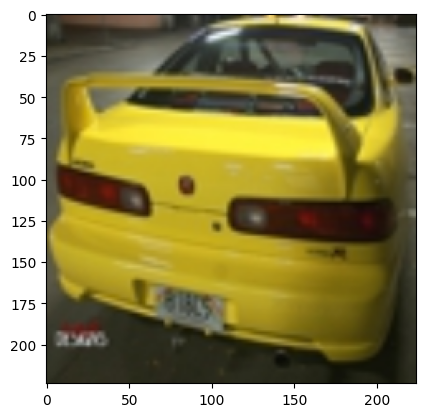

In [ ]:
idx = np.random.randint(0, images.shape[0], 1)[0]
print(idx)

plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))

## albumentation을 활용한 증강 (10장)

In [ ]:
# images, labels -> x_train, y_train, x_test, y_test로 split
x_train, x_test, y_train, y_test = train_test_split(images, labels)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5174, 224, 224, 3), (1725, 224, 224, 3), (5174,), (1725,))

In [ ]:
import albumentations as A

In [ ]:
def augment_images(images, labels, num_augments=1):
    """
    이미지와 레이블 데이터 증강

    Args:
        images: (N, H, W, C)
        labels: (N,)
        num_augments: 이미지당 증강 수
    Returns:
        aug_images: (N*num_augments, H, W, C)
        aug_labels: (N*num_augments,)
    """

    transform = A.Compose([
        A.RandomRotate90(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.OneOf([
            A.GaussNoise(p=0.1),
            A.GaussianBlur(p=1),
        ], p=0.3),
    ])

    augmented_images = []
    augmented_labels = []

    for img, label in zip(tqdm(images.astype('uint8')), labels):
        for _ in range(num_augments):
            augmented = transform(image=img)['image']
            augmented_images.append(augmented)
            augmented_labels.append(label)

    augmented_images = np.array(augmented_images).astype('int8')
    augmented_labels = np.array(augmented_labels)

    return augmented_images, augmented_labels

# 사용 예시
aug_images, aug_labels = augment_images(x_train, y_train, num_augments=1)

  0%|          | 0/5174 [00:00<?, ?it/s]

In [ ]:
aug_images.shape, aug_labels.shape

((5174, 224, 224, 3), (5174,))

In [ ]:
x_train_tot = np.concatenate((x_train, aug_images), axis=0)
y_train_tot = np.concatenate((y_train, aug_labels), axis=0)
x_train_tot.shape, y_train_tot.shape

((10348, 224, 224, 3), (10348,))

## Zero Centering

In [ ]:
# zero-centering
compute_mean = lambda imgs : np.mean(imgs, axis=0)

In [ ]:
# trainset으로 mean_img 계산
mean_img = compute_mean(x_train_tot)
mean_img.shape
zero_mean_img = mean_img.astype('int8') # 메모리 문제로 int8로 변환(근사값으로 사용)
x_train_tot = x_train_tot.astype('int8')
x_test = x_test.astype('int8')

In [ ]:
# trainset zero centering
x_train_tot -= zero_mean_img
# testset zero centering
x_test -= zero_mean_img

In [ ]:
x_train_tot.shape, x_test.shape

((10348, 224, 224, 3), (1725, 224, 224, 3))

In [ ]:
y_train_tot.shape, y_test.shape

((10348,), (1725,))

## 데이터 저장

In [79]:
# 각자 원하는 드라이브 경로에 맞게 수정합시다.
folder_path = '/content/drive/MyDrive/testset/'

In [80]:
with open(folder_path+'x_train.pickle', 'wb') as f:
    pickle.dump(x_train_tot, f)

In [81]:
with open(folder_path+'y_train.pickle', 'wb') as f:
    pickle.dump(y_train_tot, f)

In [82]:
with open(folder_path+'x_test.pickle', 'wb') as f:
    pickle.dump(x_test, f)

In [83]:
with open(folder_path+'y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

## 데이터 다운로드(gdown)

`!gdown`
* 구글 드라이브에서 파일을 다운로드하는 명령어이다.



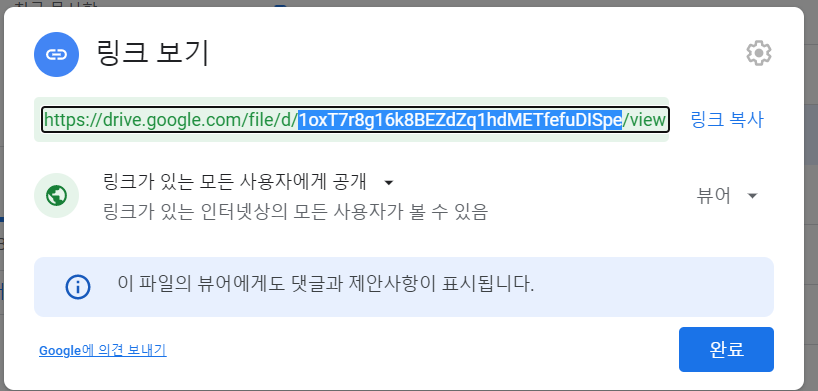

* gdown 뒤에 파일 아이디를 입력한다.
* 파일아이디는 파일 링크에서 d와 view 사이에 있는 문자에 해당한다.

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
# x_train
!gdown

# y_train
!gdown

# x_test
!gdown

# y_test
!gdown

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: the following arguments are required: url_or_id
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: the following arguments are required: url_or_id
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: the following arguments are requir

In [ ]:
import pickle

In [ ]:
with open('x_train.pickle', 'rb') as f:
    x_train = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)

with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'x_train.pickle'

In [ ]:
x_train.shape, y_train.shape

((5174, 224, 224, 3), (5174,))

In [ ]:
x_test.shape, y_test.shape

((1725, 224, 224, 3), (1725,))